# Check Dataset

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import os
from os import listdir
from os.path import isfile, join

In [152]:
os.environ['IMAGES_FOLDER']
#print(os.environ)

'/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_cropped_sample'

In [153]:
image_dir = os.environ['IMAGES_FOLDER']

#image_files = [f for f in listdir(image_dir) if isfile(join(image_dir, f))]

image_files = []
for f in listdir(image_dir):
    if isfile(os.path.join(image_dir, f)):
        if f.endswith(".jpg"):
            image_files.append(f)
        else:
            print("not jpg ignored")

X_list = []
y_list = []

for image_file in image_files:
    image_info = image_file.replace('.jpg', '').split("_")
    cat = image_info[3]
    image_data = np.array(Image.open(os.path.join(image_dir,image_file)))
    #print(image_info)
    #print(image_data.shape)
    X_list.append(image_data)
    y_list.append(cat)

X_data = np.array(X_list)
print(X_data.shape)
y_data = np.array(y_list)
print(y_data.shape)

not jpg ignored
(2657, 128, 128, 3)
(2657,)


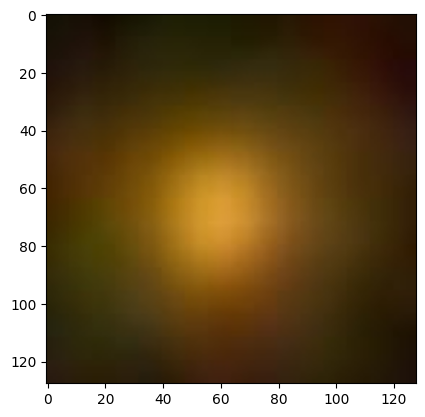

In [154]:
plt.imshow(X_data[3]) #/ use this tomorrow

In [155]:
#y.value_counts()/len(y)

In [156]:
import pandas as pd
y_data_cat = pd.Series(y_data).map({'STAR':0, 'GALAXY':1})
y_data_cat


0       0
1       1
2       1
3       1
4       1
       ..
2652    1
2653    0
2654    0
2655    0
2656    0
Length: 2657, dtype: int64

In [157]:
import pandas as pd
from tensorflow.keras.utils import to_categorical

#df = pd.read_csv('/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data')
X = X_data
y = y_data_cat

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


In [158]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2125, 128, 128, 3), (532, 128, 128, 3), (2125,), (532,))

# 1. The Convolutional Neural Network (test1)

### A. Architecture and compilation of a CNN

In [159]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

/Users/nataliamenacho/.pyenv/versions/3.10.6/envs/to_infinity_and_beyond/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [160]:
model_1.summary()

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_89 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_89 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_90 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_42 (Flatten)            │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 10)             │       615,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 634,453 (2.42 MB)

 Trainable params: 634,453 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [161]:
#Compile model
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','recall','precision','mae','mse'])


### B. Training the CNN

In [162]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5)

history_1 = model_1.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_split=0.2,
          callbacks=[es])


Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.7542 - loss: 3.0419 - mae: 0.3308 - mse: 0.2282 - precision: 0.8108 - recall: 0.8182 - val_accuracy: 0.6400 - val_loss: 0.6838 - val_mae: 0.4948 - val_mse: 0.2455 - val_precision: 0.6392 - val_recall: 1.0000
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.7199 - loss: 0.6426 - mae: 0.4648 - mse: 0.2279 - precision: 0.7128 - recall: 0.9750 - val_accuracy: 0.9529 - val_loss: 0.4483 - val_mae: 0.3317 - val_mse: 0.1534 - val_precision: 0.9466 - val_recall: 0.9815
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9080 - loss: 0.4730 - mae: 0.3436 - mse: 0.1619 - precision: 0.9097 - recall: 0.9494 - val_accuracy: 0.9506 - val_loss: 0.4225 - val_mae: 0.3198 - val_mse: 0.1398 - val_precision: 0.9401 - val_recall: 0.9852
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.9241 - loss: 0.4516 - mae: 0.3341 - mse: 0.1493 - precision: 0.9216 - recall: 0.9674 - val_accuracy: 0.9

### C. Evaluate model's performance

In [163]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9516 - loss: 0.2690 - mae: 0.1356 - mse: 0.0511 - precision: 0.9585 - recall: 0.9684


[0.2445567101240158,
 0.951127827167511,
 0.9656160473823547,
 0.9601139426231384,
 0.13460209965705872,
 0.04939873889088631]

### D. Plot loss and accuracy

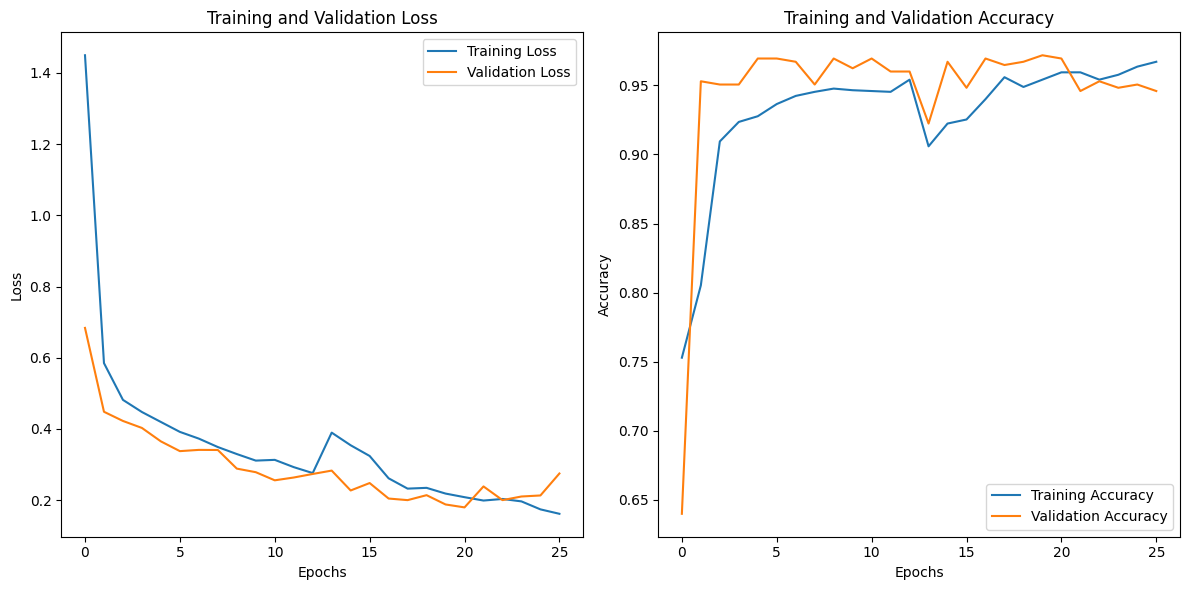

In [164]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 2. The Convolutional Neural Network (other tests)

In [165]:
# Model 2: Increase neurons in the Dense layer
model_2 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')])


# Model 3: Further increase neurons in the Dense layer
model_3 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 4: Increase number of filters in Conv2D layers
model_4 = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 5
model_5 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [166]:
# Compile the models
models = [model_2, model_3, model_4, model_5]
for i, model in enumerate(models, start=1):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'recall', 'precision', 'mae', 'mse'])
    print(f"Model {i} compiled.")

Model 1 compiled.
Model 2 compiled.
Model 3 compiled.
Model 4 compiled.


In [167]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
es = EarlyStopping(patience=5)

# Placeholder for storing histories
histories = []

# Train each model and store the history
for i, model in enumerate(models, start=1):
    print(f"Training Model {i}...")
    history = model.fit(X_train, y_train,
                        batch_size=16,
                        epochs=100,
                        validation_split=0.2,
                        callbacks=[es])
    histories.append(history)
    print(f"Model {i} trained.")


Training Model 1...
Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.6286 - loss: 6.9667 - mae: 0.4294 - mse: 0.2482 - precision: 0.6577 - recall: 0.8955 - val_accuracy: 0.6376 - val_loss: 0.6863 - val_mae: 0.4964 - val_mse: 0.2466 - val_precision: 0.6376 - val_recall: 1.0000
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.6708 - loss: 0.6816 - mae: 0.4938 - mse: 0.2443 - precision: 0.6708 - recall: 1.0000 - val_accuracy: 0.6376 - val_loss: 0.6782 - val_mae: 0.4916 - val_mse: 0.2425 - val_precision: 0.6376 - val_recall: 1.0000
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6500 - loss: 0.6741 - mae: 0.4892 - mse: 0.2405 - precision: 0.6500 - recall: 1.0000 - val_accuracy: 0.6376 - val_loss: 0.6713 - val_mae: 0.4868 - val_mse: 0.2391 - val_precision: 0.6376 - val_recall: 1.0000
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6755 - loss: 0.6621 - mae: 0.4818 - mse: 0.2346 - precision: 0.6755 - recall: 1.0000

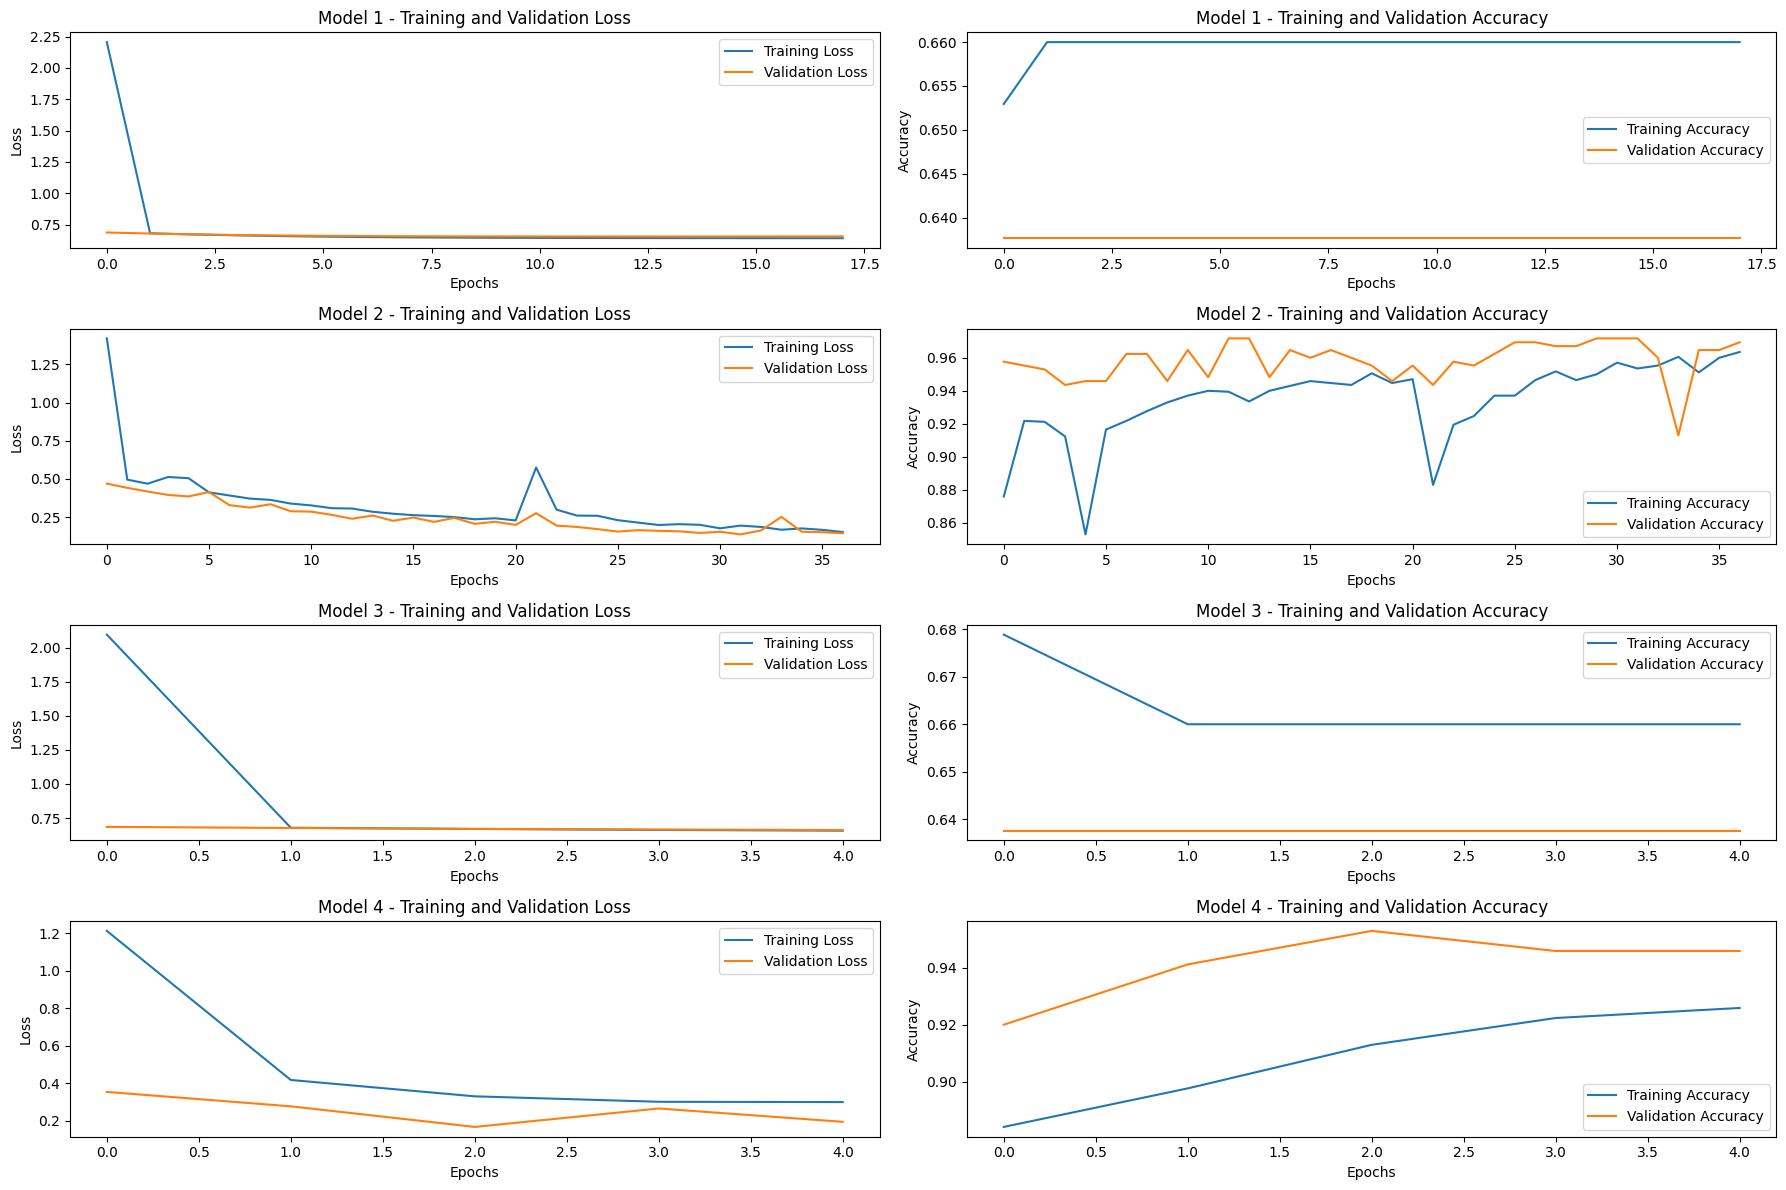

In [169]:
# Plot the training and validation loss and accuracy for all models
plt.figure(figsize=(18, 12))

for i, history in enumerate(histories, start=1):
    plt.subplot(4, 2, i * 2 - 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} - Training and Validation Loss')
    plt.legend()

    plt.subplot(4, 2, i * 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Model {i} - Training and Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

In [148]:
y_train.value_counts()/len(y_train)

1    0.691606
0    0.308394
Name: count, dtype: float64

## Last model (fingers crossed - final test )

In [ ]:
#Model alpha: Further increase neurons in the Dense layer
model_alpha = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Model beta: Further increase neurons in the Dense layer
model_beta = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the models
models = [model_alpha, model_beta]
for i, model in enumerate(models, start=1):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'recall', 'precision', 'mae', 'mse'])
    print(f"Model {i} compiled.")

In [ ]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5)

history_1 = model_1.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_split=0.2,
          callbacks=[es])